### Support Vector Regression (SVR)

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
from sklearn.datasets import make_regression

In [83]:
# The `noise=10` parameter in the `make_regression` function is specifying the standard deviation of the gaussian noise added to the output. In this case, the noise level is set to 10, meaning that the generated data will have some random noise added to it with a standard deviation of 10. This helps to make the generated data more realistic and closer to real-world scenarios where data is not perfectly linear.
X, y = make_regression(n_samples=1000,n_targets=1, n_features=2, 
noise=10)

<Axes: >

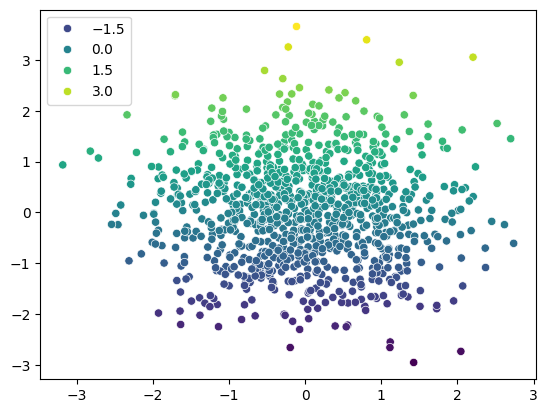

In [84]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=X[:,1], palette='viridis')

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
from sklearn.svm import SVR

In [87]:
svr = SVR(kernel='linear')

In [88]:
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [89]:
svr.coef_

array([[58.03096456, 70.0174784 ]])

In [90]:
svr.intercept_

array([-0.25684102])

In [91]:
# `svr.score(X_train, y_train)` is a method used to calculate the accuracy of a Support Vector Regressor (SVR) model on the training data `(X_train, y_train)`. It computes the coefficient of determination R^2 of the prediction. The R^2 score is a measure of how well the SVR model fits the training data, with a score of 1 indicating a perfect fit.
svr.score(X_train, y_train)

0.9879375877488297

In [92]:
y_pred = svr.predict(X_test)

In [93]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

7.89796236872842
0.9851611114072575
97.32516929458136


<Axes: >

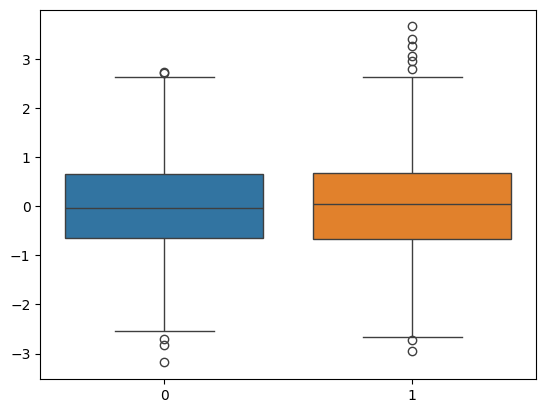

In [94]:
sns.boxplot(X)

In [95]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear'],
              'epsilon':[0.1,0.2,0.3]
              }

In [96]:
grid=GridSearchCV(SVR(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [97]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.774 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.748 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.757 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.764 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.770 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.774 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.748 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.757 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.764 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.770 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [98]:
grid.best_params_

{'C': 100, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'linear'}

In [99]:
y_pred4=grid.predict(X_test)
print(r2_score(y_test,y_pred4))

0.9856435921529499
